In [5]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

MANUALLY ANNOTATED SPEECHES - Available in HLS_man

| COP19        | COP20             | COP21             | COP22         | COP23       | COP24     | COP25     | COP26       | COP27       | COP28       |
|--------------|-------------------|-------------------|---------------|-------------|-----------|-----------|-------------|-------------|-------------|
| japan        | Holy see          | Trinidad & Tobago | Lao           | Netherlands | Malawi    | Serbia    | Russia      | Kazakhstan  | Belgium     |
| namibia      | kenya             | EU                | czechrepublic | Suriname    | Rwanda    | Cambodia  | Grenada     | Greece      | Gambia      |
| sierra leone | micronesia        | Nepal             | israel        | Vanatu      | Indonesia | Uganda    | Philippines | Australia   | Jamaica     |
| usa          | republic of korea | Afghanistan       | belize        | Croatia     | Macedonia | Mauritius | Slovakia    | Serbia      | New Zealand |
| timor leste  | tonga             | Bosnia Herz.      | thailand      | Ireland     | Lesotho   | Malaysia  | Barbados    | South Sudan | Jordan      |
|              | tonga_PSIDS       |                   |               |             |           |           |             |             |             |

## Exploratory data analysis of the manually annotated speeches
Raw documents are available in raw annotations directory. Evaluation is based on the dummies dataframe.

## Full dataset
Evaluation is based on the dummies dataset to enable correlation comparison between the individual labels.

In [7]:
HLS_dummies = pd.read_csv('final data/HLS_dummies')

Interested in potential correlations in relevant sentences. As not relevant sentences and statements of intent are not labelled for additional categories, it would not make sense to include these.

Use of a triangular heatmap to reduce redundany

In [8]:
# Select only relevant rows
HLS_dummies_relevant = HLS_dummies[HLS_dummies['relevance_2']==1]

# Drop columns
HLS_dummies_relevant= HLS_dummies_relevant.drop(columns = ['relevance_0', 'relevance_1', 'principle_0','topic_0', 'unit_0','shape_0','shape_8'])

# Print dataframe
HLS_dummies_relevant.head()

,Unnamed: 0,id,Text,relevance_2,principle_1,principle_2,principle_3,principle_4,principle_5,principle_6,...,unit_5,unit_6,unit_7,shape_1,shape_2,shape_3,shape_4,shape_5,shape_6,shape_7
3,3,COP19_japan,Mr. President: A fair and effective framewor...,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,5,COP19_japan,Such a framework must be based on “nationally ...,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
44,44,COP19_namibia,It should not only enable us to discuss global...,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
53,53,COP19_namibia,Global warming is a catastrophic problem that ...,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
54,54,COP19_namibia,"Therefore, the multilateralism approach remain...",1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [9]:
# #Plot a heatmap - all categories
# plt.figure(figsize=(15,15))
# plt.title('Heatmap Relevant sentences - All categories')
# sns.heatmap(HLS_dummies_relevant.drop(['id','Text','relevance_2'], axis=1).corr(), mask=mask)

corr =  HLS_dummies_relevant.drop(['id','Text','relevance_2'], axis=1).corr()

# Create a mask
mask = np.triu(np.ones_like(corr, dtype=bool))

# Create a custom divergin palette
cmap = sns.diverging_palette(100, 7, s=75, l=40,
                            n=5, center="light", as_cmap=True)

plt.figure(figsize=(10, 6))
sns.heatmap(corr, mask=mask, center=0, annot=True,
            fmt='.2f', square=True, cmap=cmap)

plt.show();

In [46]:
principle = ['principle_1', 'principle_2', 'principle_3', 'principle_4', 'principle_5', 'principle_6']
topic = ['topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5', 'topic_6', 'topic_7', 'topic_8', 'topic_9']
unit = ['unit_1', 'unit_2', 'unit_3', 'unit_4', 'unit_5', 'unit_6', 'unit_7']
shape = ['shape_1', 'shape_2', 'shape_3', 'shape_4', 'shape_5', 'shape_6', 'shape_7']
basic_drop = ['id','Text','relevance_2']

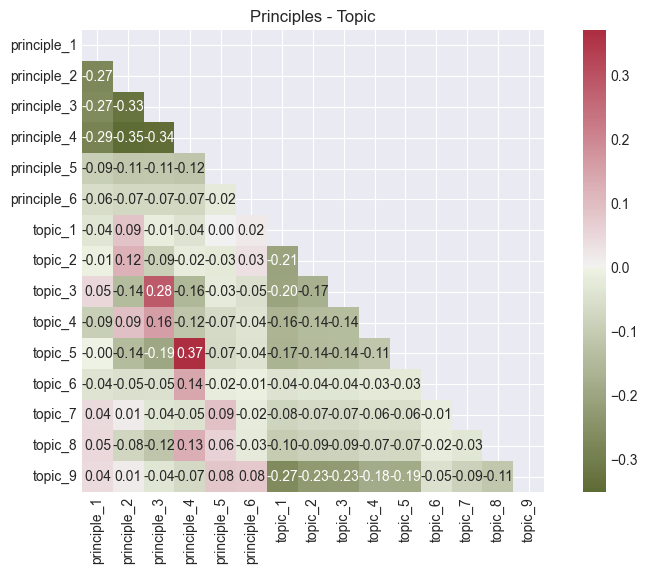

In [47]:
# Build list
list = basic_drop + shape + unit

#Plot a heatmap - principles with topic
corr =  HLS_dummies_relevant.drop(list, axis=1).corr()

# Create a mask
mask = np.triu(np.ones_like(corr, dtype=bool))

# Create a custom divergin palette
cmap = sns.diverging_palette(100, 7, s=75, l=40,
                            n=5, center="light", as_cmap=True)

plt.figure(figsize=(10, 6))
sns.heatmap(corr, mask=mask, center=0, annot=True,
            fmt='.2f', square=True, cmap=cmap)
plt.title('Principles - Topic')
plt.show();

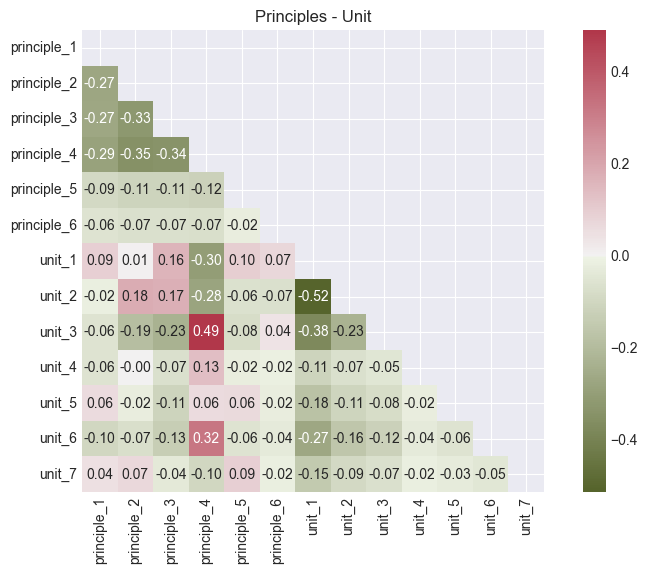

In [48]:
#Plot a heatmap - principles with unit
list = basic_drop + shape + topic

corr =  HLS_dummies_relevant.drop(list, axis=1).corr()

# Create a mask
mask = np.triu(np.ones_like(corr, dtype=bool))

# Create a custom divergin palette
cmap = sns.diverging_palette(100, 7, s=75, l=40,
                            n=5, center="light", as_cmap=True)

plt.figure(figsize=(10, 6))
sns.heatmap(corr, mask=mask, center=0, annot=True,
            fmt='.2f', square=True, cmap=cmap)
plt.title('Principles - Unit')
plt.show();

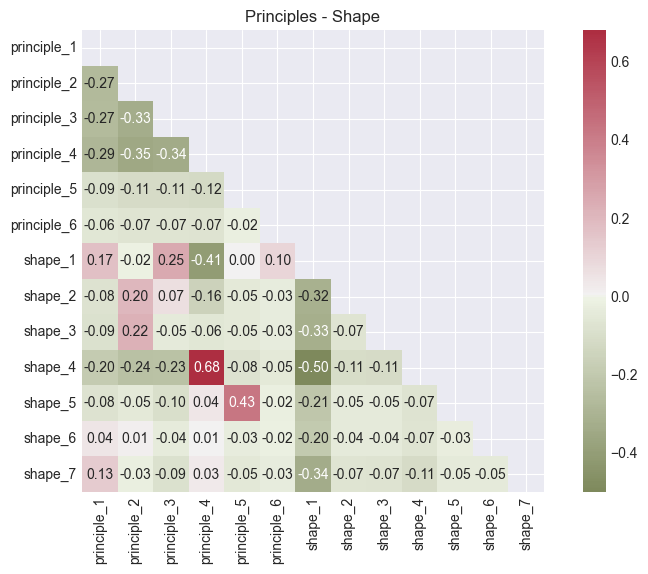

In [49]:
#Plot a heatmap - principles with shape
list = basic_drop + unit + topic

corr =  HLS_dummies_relevant.drop(list, axis=1).corr()

# Create a mask
mask = np.triu(np.ones_like(corr, dtype=bool))

# Create a custom divergin palette
cmap = sns.diverging_palette(100, 7, s=75, l=40,
                            n=5, center="light", as_cmap=True)

plt.figure(figsize=(10, 6))
sns.heatmap(corr, mask=mask, center=0, annot=True,
            fmt='.2f', square=True, cmap=cmap)
plt.title('Principles - Shape')
plt.show();

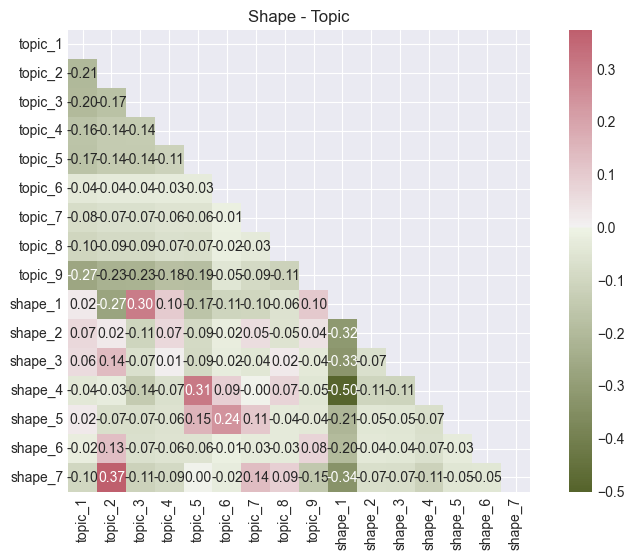

In [50]:
#Plot a heatmap - shape and topic
list = basic_drop + unit + principle

corr =  HLS_dummies_relevant.drop(list, axis=1).corr()

# Create a mask
mask = np.triu(np.ones_like(corr, dtype=bool))

# Create a custom divergin palette
cmap = sns.diverging_palette(100, 7, s=75, l=40,
                            n=5, center="light", as_cmap=True)

plt.figure(figsize=(10, 6))
sns.heatmap(corr, mask=mask, center=0, annot=True,
            fmt='.2f', square=True, cmap=cmap)
plt.title('Shape - Topic')
plt.show();

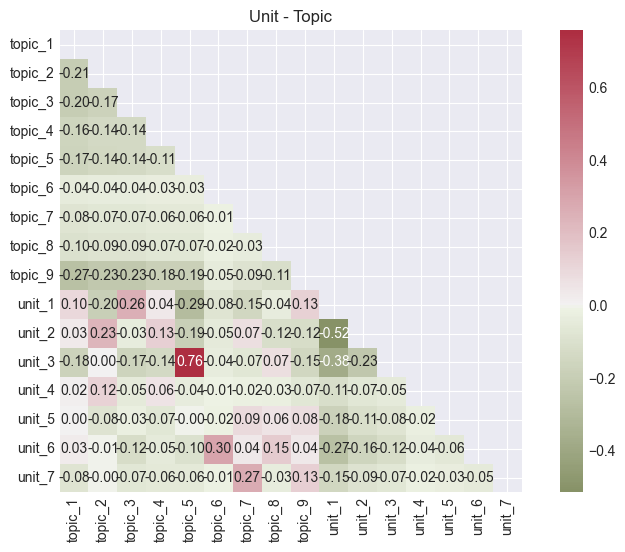

In [51]:
#Plot a heatmap - unit and topic
list = basic_drop + shape + principle

corr =  HLS_dummies_relevant.drop(list, axis=1).corr()

# Create a mask
mask = np.triu(np.ones_like(corr, dtype=bool))

# Create a custom divergin palette
cmap = sns.diverging_palette(100, 7, s=75, l=40,
                            n=5, center="light", as_cmap=True)

plt.figure(figsize=(10, 6))
sns.heatmap(corr, mask=mask, center=0, annot=True,
            fmt='.2f', square=True, cmap=cmap)
plt.title('Unit - Topic')
plt.show();

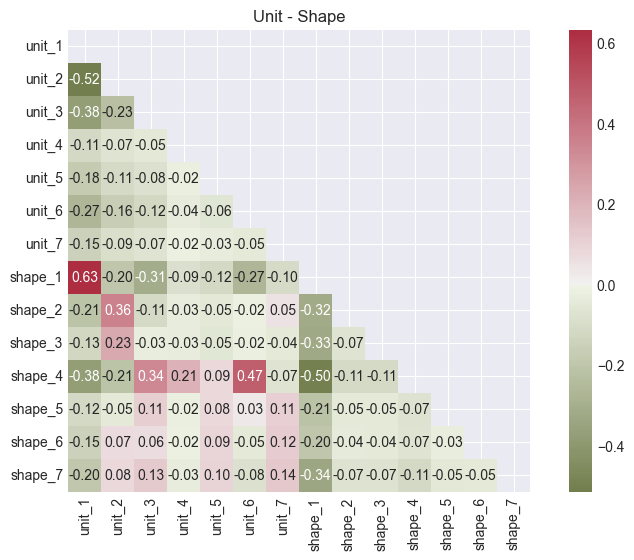

In [52]:
#Plot a heatmap - unit and shape
list = basic_drop + topic + principle

corr =  HLS_dummies_relevant.drop(list, axis=1).corr()

# Create a mask
mask = np.triu(np.ones_like(corr, dtype=bool))

# Create a custom divergin palette
cmap = sns.diverging_palette(100, 7, s=75, l=40,
                            n=5, center="light", as_cmap=True)

plt.figure(figsize=(10, 6))
sns.heatmap(corr, mask=mask, center=0, annot=True,
            fmt='.2f', square=True, cmap=cmap)
plt.title('Unit - Shape')
plt.show();

Correlation that is displayed is the pearson correlation coefficient. With 1 a perfect positive correlation and -1 a perfect negative correlation. R>0.7 is a strong correlation, < 0.3 is a weak correlation.

## Grouped dataset
Evaluate labels per speech.

In [53]:
# Group by the 'Group' column and sum the other columns
HLS_dummies_grouped = HLS_dummies.groupby('id').sum().reset_index()

HLS_dummies_grouped

C:\Users\Suze van Santen\AppData\Local\Temp\ipykernel_10952\1972882353.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  HLS_dummies_grouped = HLS_dummies.groupby('id').sum().reset_index()


,id,relevance_0,relevance_1,relevance_2,principle_0,principle_1,principle_2,principle_3,principle_4,principle_5,...,unit_7,shape_0,shape_1,shape_2,shape_3,shape_4,shape_5,shape_6,shape_7,shape_8
0,COP19_japan,17,18,2,35,0,1,1,0,0,...,0,35,0,1,1,0,0,0,0,0
1,COP19_namibia,28,3,16,31,4,2,7,2,1,...,1,31,10,0,0,1,1,2,2,0
2,COP19_sierra_leone,20,2,3,22,0,0,1,1,1,...,0,22,2,0,0,0,0,0,1,0
3,COP19_timor_leste,18,2,12,20,5,1,1,5,0,...,1,20,4,0,3,3,0,0,2,0
4,COP19_usa,18,3,5,21,1,2,1,0,0,...,0,21,2,1,2,0,0,0,0,0
5,COP20_holy_sea,21,0,13,21,2,5,5,0,1,...,0,21,7,3,2,0,0,0,1,0
6,COP20_kenya,16,1,8,17,1,2,3,2,0,...,0,17,4,1,0,2,0,0,1,0
7,COP20_micronesia,24,1,7,25,4,2,0,1,0,...,0,25,5,0,0,1,0,1,0,0
8,COP20_republicofkorea,20,2,7,22,3,2,1,0,1,...,0,22,5,1,0,0,1,0,0,0
9,COP20_tonga,15,2,4,17,0,0,3,0,1,...,0,17,4,0,0,0,0,0,0,0


In [54]:
HLS_dummies_grouped.describe()

,relevance_0,relevance_1,relevance_2,principle_0,principle_1,principle_2,principle_3,principle_4,principle_5,principle_6,...,unit_7,shape_0,shape_1,shape_2,shape_3,shape_4,shape_5,shape_6,shape_7,shape_8
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,...,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.0
mean,19.588235,5.431373,5.235294,25.019608,0.960784,1.313725,1.274510,1.411765,0.196078,0.078431,...,0.137255,25.019608,3.117647,0.333333,0.352941,0.764706,0.156863,0.137255,0.372549,0.0
std,9.191684,4.392061,3.473259,10.754516,1.295543,1.435133,1.484297,1.981681,0.448090,0.271524,...,0.347540,10.754516,2.214923,0.653197,0.716199,1.335488,0.367290,0.400979,0.662142,0.0
min,4.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,13.500000,2.000000,3.000000,17.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,17.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,18.000000,4.000000,5.000000,23.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,23.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,24.000000,7.000000,6.000000,29.000000,1.000000,2.000000,1.500000,2.000000,0.000000,0.000000,...,0.000000,29.000000,5.000000,0.500000,0.000000,1.000000,0.000000,0.000000,1.000000,0.0
max,53.000000,19.000000,16.000000,60.000000,5.000000,5.000000,7.000000,11.000000,2.000000,1.000000,...,1.000000,60.000000,10.000000,3.000000,3.000000,6.000000,1.000000,2.000000,2.000000,0.0


## GROUPED Evaluation of relevance

In [55]:
relevance = ['relevance_0', 'relevance_1', 'relevance_2']

In [56]:
## Rename columns
relevance_grouped = HLS_dummies_grouped[relevance + ['id']]

# Rename columns
string_relevance = ['not relevant','statement of intent', 'relevant']

# Create a dictionary to map old names to new names
column_name_map = dict(zip(relevance, string_relevance))

# Rename columns using the dictionary
relevance_grouped= relevance_grouped.rename(columns=column_name_map)

Text(0, 0.5, 'Occurrences')

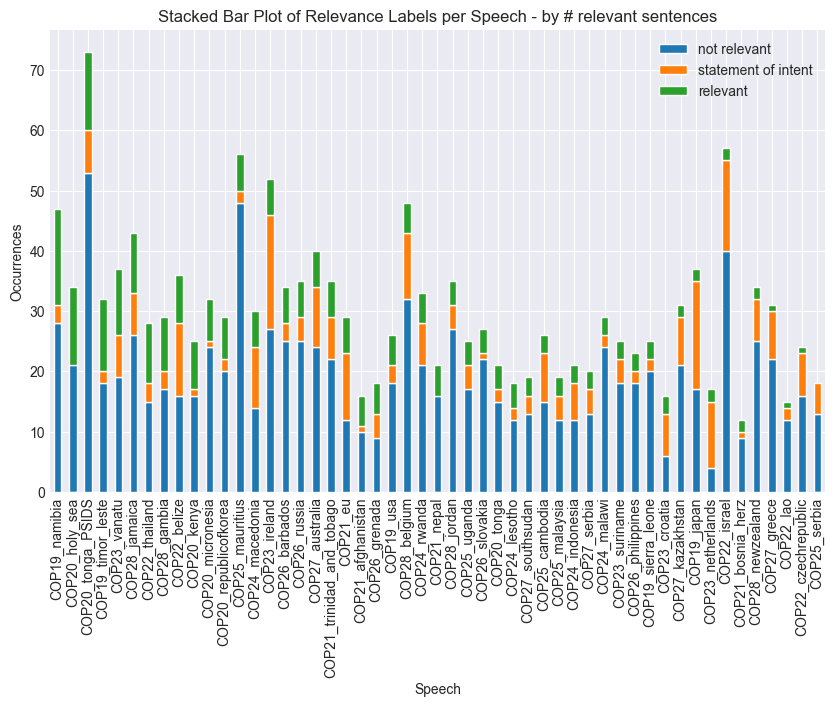

In [57]:
# Sort relevance_grouped on highest number of relevant sentences
sorted = relevance_grouped.sort_values(by='relevant', ascending=False)

# Creating a stacked bar plot
sorted.set_index('id', inplace=True)
sorted.plot(kind='bar', stacked=True, figsize=(10, 6))

# Adding labels and title
plt.title('Stacked Bar Plot of Relevance Labels per Speech - by # relevant sentences')
plt.xlabel('Speech')
plt.ylabel('Occurrences')

In [58]:
relevance = sorted.copy()

# Calculate sum of sentences
relevance['sentences'] = relevance[string_relevance].sum(axis=1)

# determine percentage relevance
relevance['relevant %'] = relevance['relevant'] / relevance['sentences']

# determine percentage statement of intent
relevance['statement of intent %'] = relevance['statement of intent'] / relevance['sentences']

# Sort by relevance %
sorted_relevance = relevance.sort_values(by='relevant %', ascending=False)
sorted_relevance

,not relevant,statement of intent,relevant,sentences,relevant %,statement of intent %
id,,,,,,
COP20_holy_sea,21,0,13,34,0.382353,0.000000
COP19_timor_leste,18,2,12,32,0.375000,0.062500
COP22_thailand,15,3,10,28,0.357143,0.107143
COP19_namibia,28,3,16,47,0.340426,0.063830
COP20_kenya,16,1,8,25,0.320000,0.040000
COP21_afghanistan,10,1,5,16,0.312500,0.062500
COP28_gambia,17,3,9,29,0.310345,0.103448
COP23_vanatu,19,7,11,37,0.297297,0.189189
COP26_grenada,9,4,5,18,0.277778,0.222222


In [59]:
sorted_relevance.describe()

,not relevant,statement of intent,relevant,sentences,relevant %,statement of intent %
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,19.588235,5.431373,5.235294,30.254902,0.174678,0.182034
std,9.191684,4.392061,3.473259,12.044655,0.092679,0.132457
min,4.000000,0.000000,0.000000,12.000000,0.000000,0.000000
25%,13.500000,2.000000,3.000000,21.000000,0.115385,0.085145
50%,18.000000,4.000000,5.000000,29.000000,0.160000,0.160000
75%,24.000000,7.000000,6.000000,35.000000,0.222222,0.258065
max,53.000000,19.000000,16.000000,73.000000,0.382353,0.647059


Draw histogram/kde for visualizing percentages of relevant data

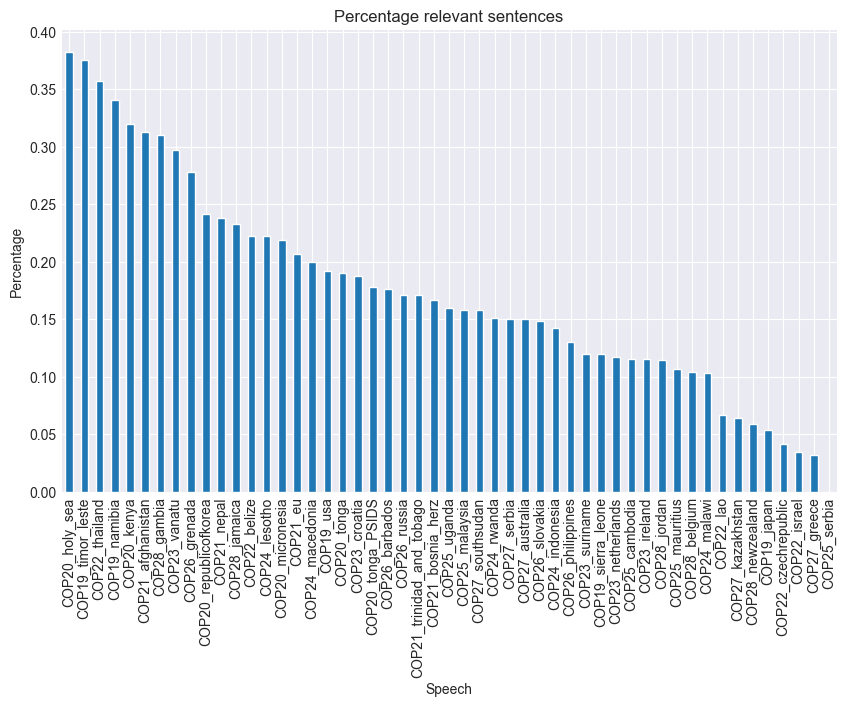

In [63]:
# Plotting a bar plot for the percentages
sorted_relevance['relevant %'].plot(kind='bar', stacked=True, figsize=(10, 6))

# Adding labels and title
plt.title('Percentage relevant sentences')
plt.xlabel('Speech')
plt.ylabel('Percentage')

# Showing the plot
plt.show()

## GROUPED evaluation of categories

### PRINCIPLE

In [64]:
## Evaluates only the relevant sentences

principle_grouped = HLS_dummies_grouped[['id', 'relevance_2', 'principle_1', 'principle_2', 'principle_3', 'principle_4', 'principle_5','principle_6']]

# Rename columns
string_principle = ['general normative statement', 'egalitarian', 'utilitarian','prioritarian', 'sufficientarian', 'libertarian']

# Create a dictionary to map old names to new names
column_name_map = dict(zip(principle, string_principle))

# Rename columns using the dictionary
principle_grouped = principle_grouped.rename(columns=column_name_map)

# Sort by nr of relevant sentences column
sorted_principle = principle_grouped.sort_values(by='relevance_2', ascending=False).drop('relevance_2', axis =1)

Text(0, 0.5, 'Relevant sentences')

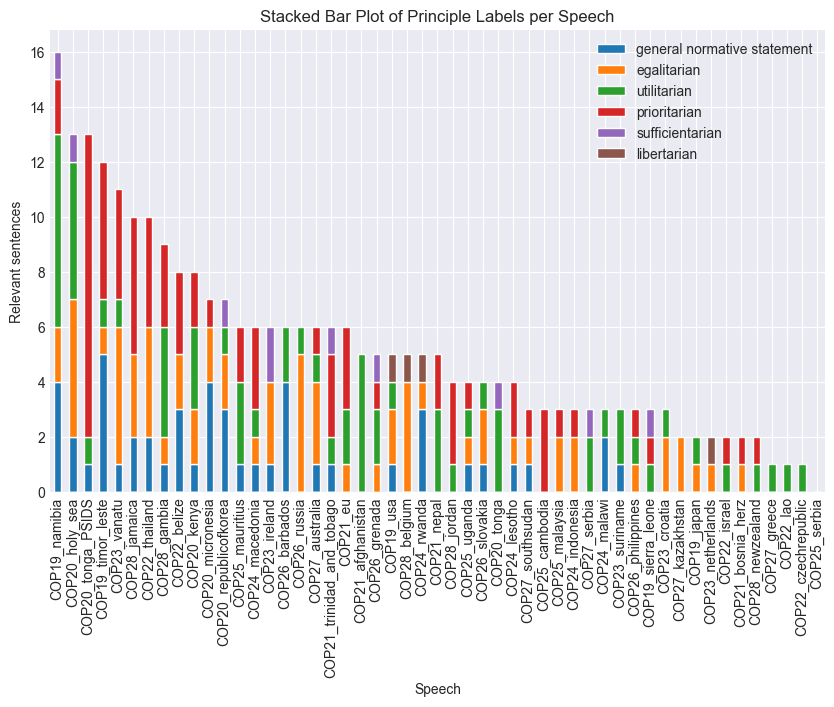

In [65]:
# Creating a stacked bar plot
sorted_principle.set_index('id', inplace=True)
sorted_principle.plot(kind='bar', stacked=True, figsize=(10, 6))

# Adding labels and title
plt.title('Stacked Bar Plot of Principle Labels per Speech')
plt.xlabel('Speech')
plt.ylabel('Relevant sentences')

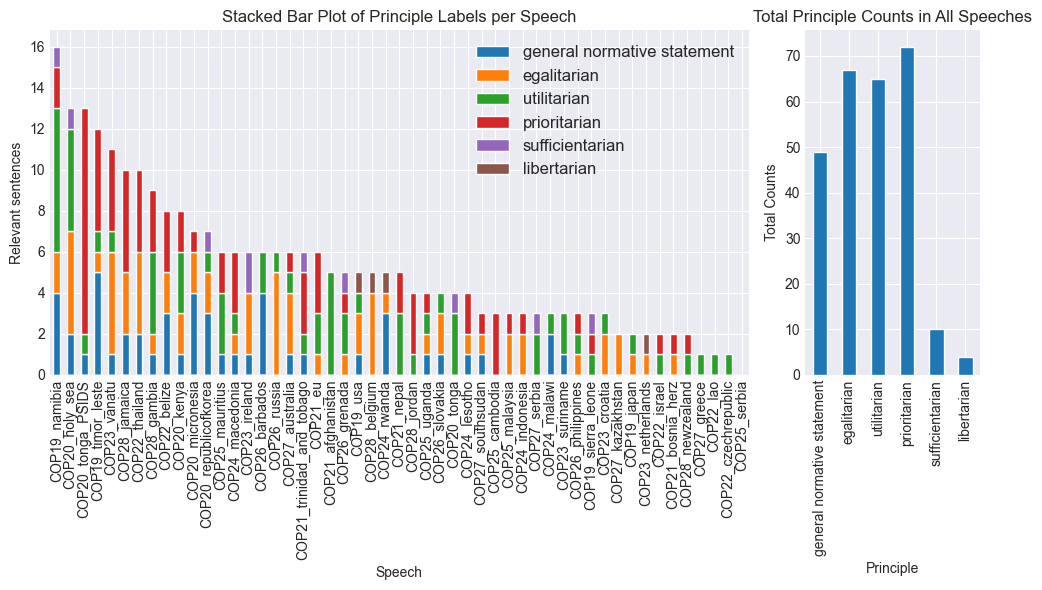

In [93]:
# Create a grid layout with GridSpec
fig = plt.figure(figsize=(10,6 ))
gs = fig.add_gridspec(1, 2, width_ratios=[4, 1])

# Create the axes
ax0 = fig.add_subplot(gs[0])
ax1 = fig.add_subplot(gs[1])

# Define a color palette
palette = sns.color_palette("husl", n_colors=len(sorted_principle.columns))

# Stacked bar plot
sorted_principle.plot(kind='bar', stacked=True, ax=ax0)

# Adding labels and title to the stacked bar plot
ax0.set_title('Stacked Bar Plot of Principle Labels per Speech')
ax0.set_xlabel('Speech')
ax0.set_ylabel('Relevant sentences')

# Calculate the total counts for each principle
total_principle_counts = sorted_principle.sum()

# Create the bar plot for total principle counts
total_principle_counts.plot(kind='bar', ax=ax1)

# Adding labels and title to the total counts bar plot
ax1.set_title('Total Principle Counts in All Speeches')
ax1.set_xlabel('Principle')
ax1.set_ylabel('Total Counts')

# Rotate x-axis labels for clarity
for ax in [ax0, ax1]:
    ax.set_xticklabels(ax.get_xticklabels())
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, fontsize='large')

plt.tight_layout()
plt.show()

### TOPIC

In [119]:
topic_columns = topic + ['id', 'relevance_2']

topic_grouped = HLS_dummies_grouped[topic_columns]

# Rename columns
string = ['new UNFCCC policy','UNFCCC agreements and principles','urgency','cooperation', 'financial mechanisms', 'adaptation', 'mitigation', 'adaptation and mitigation', 'other']

# Create a dictionary to map old names to new names
column_name_map = dict(zip(topic, string))

# Rename columns using the dictionary
topic_grouped = topic_grouped.rename(columns=column_name_map)

# Sort by nr of relevant sentences column
sorted_topic= topic_grouped.sort_values(by='relevance_2', ascending=False).drop('relevance_2', axis =1)

sorted_topic

,new UNFCCC policy,UNFCCC agreements and principles,urgency,cooperation,financial mechanisms,adaptation,mitigation,adaptation and mitigation,other,id
1,3,4,5,0,1,0,1,1,1,COP19_namibia
5,1,2,1,4,0,0,0,1,4,COP20_holy_sea
10,0,3,3,1,2,0,1,0,3,COP20_tonga_PSIDS
3,1,3,2,0,1,0,3,2,0,COP19_timor_leste
25,3,0,2,1,2,0,1,0,2,COP23_vanatu
48,1,1,1,2,3,1,0,0,1,COP28_jamaica
20,4,3,1,0,0,0,0,1,1,COP22_thailand
47,0,2,0,4,1,0,0,0,2,COP28_gambia
16,4,0,0,0,2,0,0,0,2,COP22_belize
6,3,2,0,1,1,0,0,1,0,COP20_kenya


Text(0, 0.5, 'Relevant sentences')

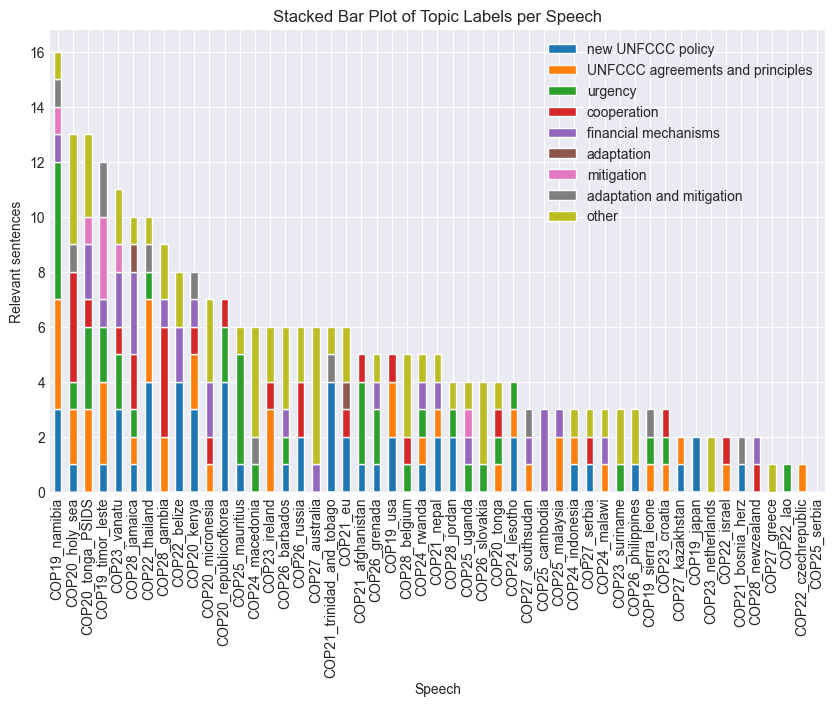

In [75]:
# Creating a stacked bar plot
sorted_topic.set_index('id', inplace=True)
sorted_topic.plot(kind='bar', stacked=True, figsize=(10, 6))

# Adding labels and title
plt.title('Stacked Bar Plot of Topic Labels per Speech')
plt.xlabel('Speech')
plt.ylabel('Relevant sentences')

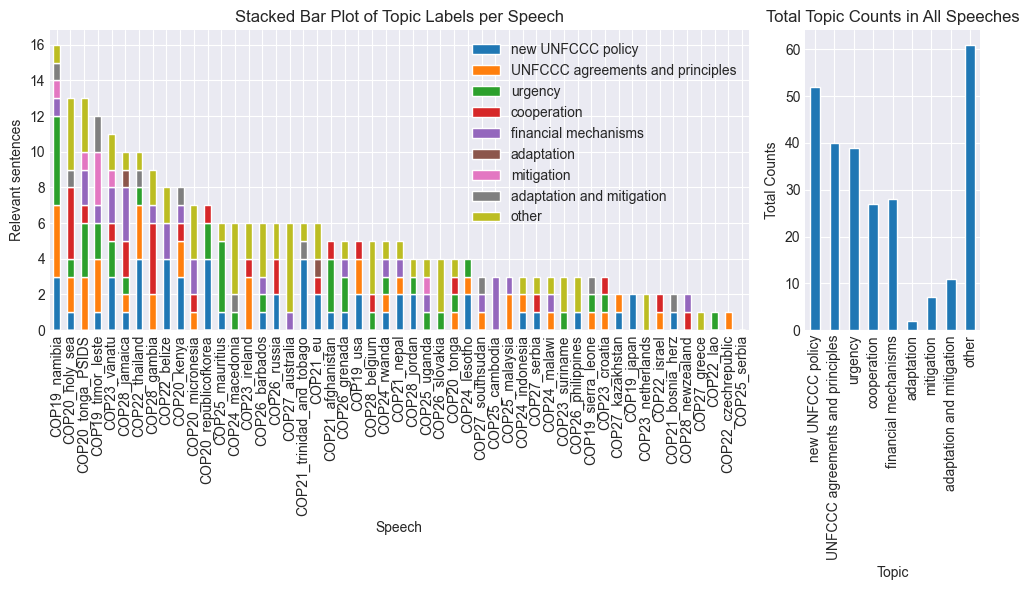

In [96]:
# Create a grid layout with GridSpec
fig = plt.figure(figsize=(10,6 ))
gs = fig.add_gridspec(1, 2, width_ratios=[4, 1])

# Create the axes
ax0 = fig.add_subplot(gs[0])
ax1 = fig.add_subplot(gs[1])

# Stacked bar plot
sorted_topic.plot(kind='bar', stacked=True, ax=ax0)

# Adding labels and title to the stacked bar plot
ax0.set_title('Stacked Bar Plot of Topic Labels per Speech')
ax0.set_xlabel('Speech')
ax0.set_ylabel('Relevant sentences')

# Calculate the total counts for each principle
total_topic_counts = sorted_topic.sum()

# Create the bar plot for total principle counts
total_topic_counts.plot(kind='bar', ax=ax1)

# Adding labels and title to the total counts bar plot
ax1.set_title('Total Topic Counts in All Speeches')
ax1.set_xlabel('Topic')
ax1.set_ylabel('Total Counts')

# Rotate x-axis labels for clarity
for ax in [ax0, ax1]:
    ax.set_xticklabels(ax.get_xticklabels())
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels)

plt.tight_layout()
plt.show()

### UNIT

In [101]:
unit_columns = unit + ['id', 'relevance_2']

unit_grouped = HLS_dummies_grouped[unit_columns]

# Rename columns
string = ['not indicated', 'responsibility', 'financial resources', 'technological resources', 'financial and technological resources', 'support', 'other']

# Create a dictionary to map old names to new names
column_name_map = dict(zip(unit, string))

# Rename columns using the dictionary
unit_grouped = unit_grouped.rename(columns=column_name_map)

# Sort by nr of relevant sentences column
sorted_unit= unit_grouped.sort_values(by='relevance_2', ascending=False).drop('relevance_2', axis =1)

Text(0, 0.5, 'Relevant sentences')

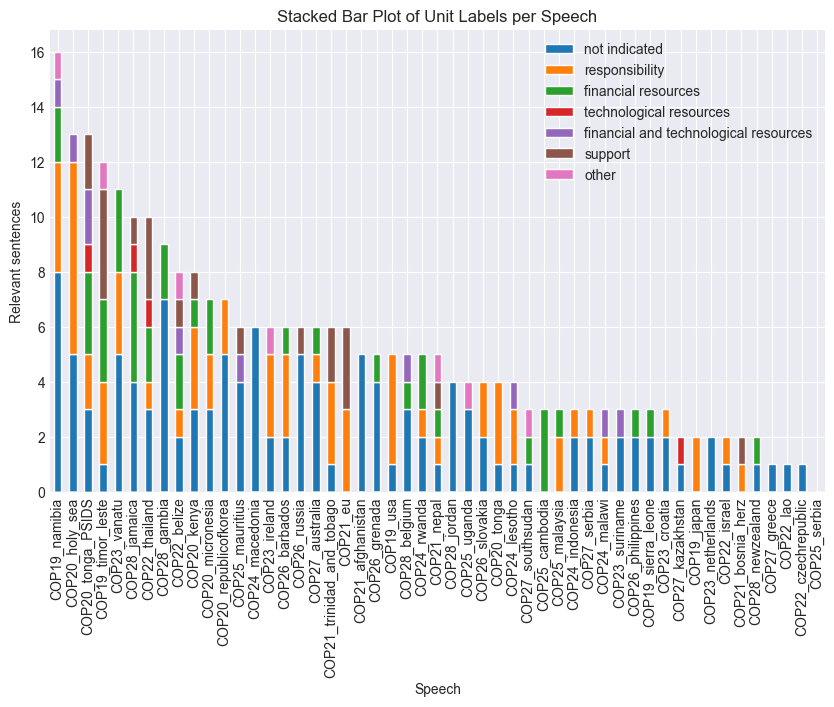

In [102]:
# Creating a stacked bar plot
sorted_unit.set_index('id', inplace=True)
sorted_unit.plot(kind='bar', stacked=True, figsize=(10, 6))

# Adding labels and title
plt.title('Stacked Bar Plot of Unit Labels per Speech')
plt.xlabel('Speech')
plt.ylabel('Relevant sentences')

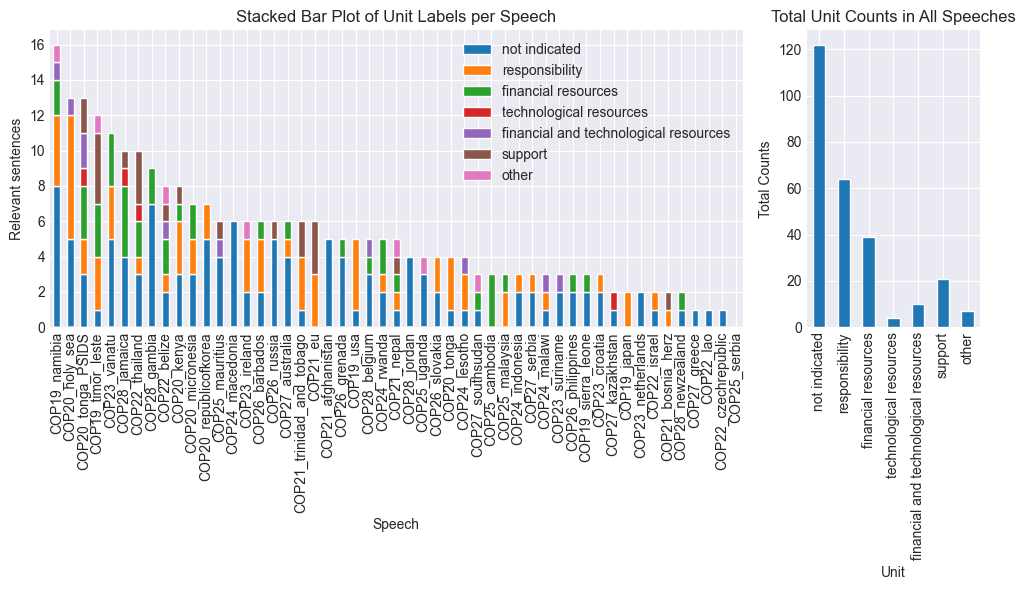

In [121]:
# Create a grid layout with GridSpec
fig = plt.figure(figsize=(10,6 ))
gs = fig.add_gridspec(1, 2, width_ratios=[4, 1])

# Create the axes
ax0 = fig.add_subplot(gs[0])
ax1 = fig.add_subplot(gs[1])

# Stacked bar plot
sorted_unit.plot(kind='bar', stacked=True, ax=ax0)

# Adding labels and title to the stacked bar plot
ax0.set_title('Stacked Bar Plot of Unit Labels per Speech')
ax0.set_xlabel('Speech')
ax0.set_ylabel('Relevant sentences')

# Calculate the total counts for each principle
total_unit_counts = sorted_unit.sum()

# Create the bar plot for total principle counts
total_unit_counts.plot(kind='bar', ax=ax1)

# Adding labels and title to the total counts bar plot
ax1.set_title('Total Unit Counts in All Speeches')
ax1.set_xlabel('Unit')
ax1.set_ylabel('Total Counts')

# Rotate x-axis labels for clarity
for ax in [ax0, ax1]:
    ax.set_xticklabels(ax.get_xticklabels())
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels)

plt.tight_layout()
plt.show()

### SHAPE

In [104]:
shape_columns = shape + ['id', 'relevance_2']

shape_grouped = HLS_dummies_grouped[shape_columns]

# Rename columns
string = ['not indicated', 'equality', 'equity', 'priority to worst off', 'needs based', 'proportional to contribution', 'proportional to commitments']

# Create a dictionary to map old names to new names
column_name_map = dict(zip(shape, string))

# Rename columns using the dictionary
shape_grouped = shape_grouped.rename(columns=column_name_map)

# Sort by nr of relevant sentences column
sorted_shape= shape_grouped.sort_values(by='relevance_2', ascending=False).drop('relevance_2', axis =1)

Text(0, 0.5, 'Relevant sentences')

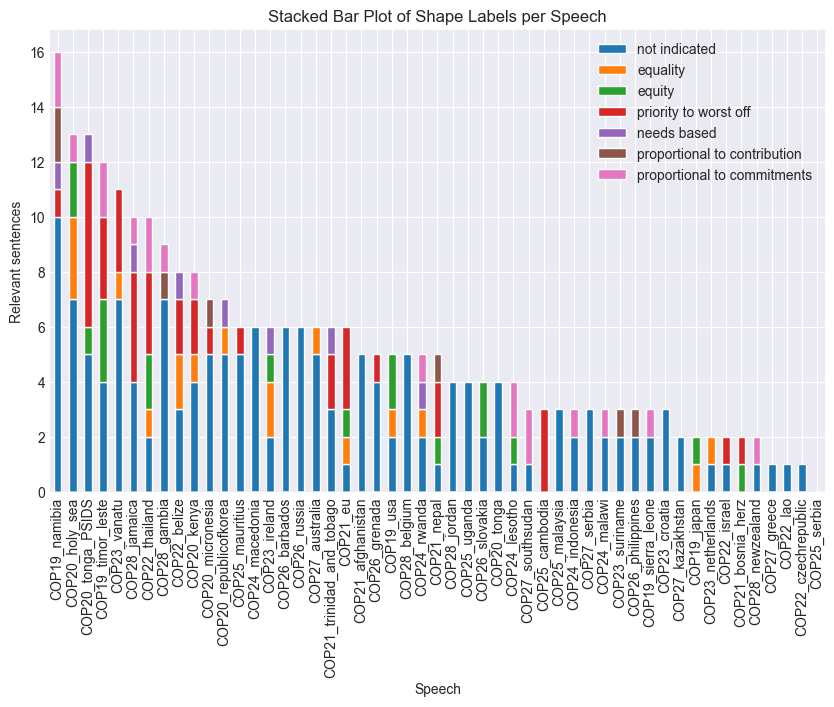

In [105]:
# Creating a stacked bar plot
sorted_shape.set_index('id', inplace=True)
sorted_shape.plot(kind='bar', stacked=True, figsize=(10, 6))

# Adding labels and title
plt.title('Stacked Bar Plot of Shape Labels per Speech')
plt.xlabel('Speech')
plt.ylabel('Relevant sentences')

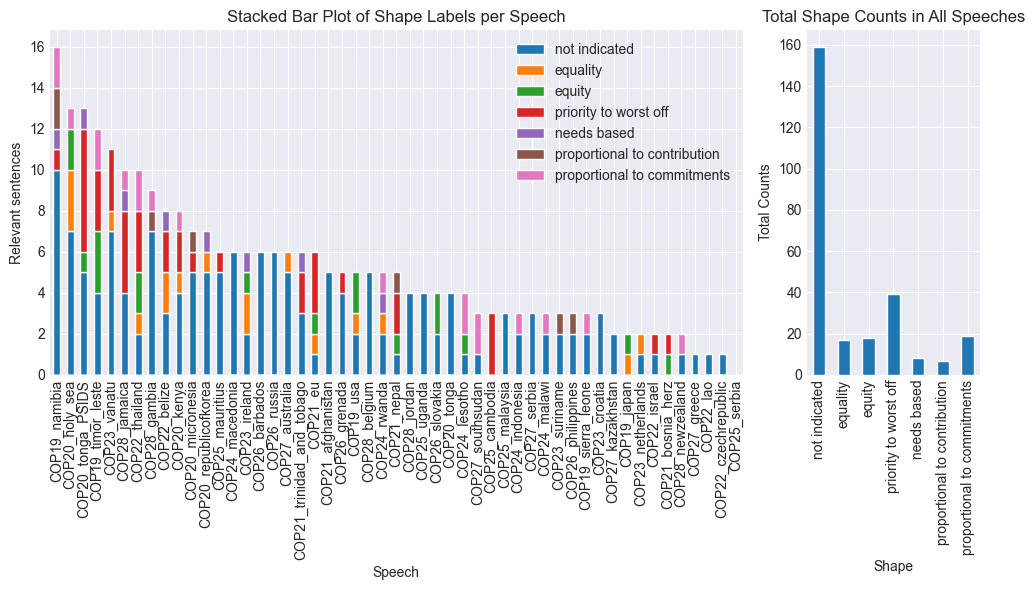

In [120]:
# Create a grid layout with GridSpec
fig = plt.figure(figsize=(10,6 ))
gs = fig.add_gridspec(1, 2, width_ratios=[4, 1])

# Create the axes
ax0 = fig.add_subplot(gs[0])
ax1 = fig.add_subplot(gs[1])

# Stacked bar plot
sorted_shape.plot(kind='bar', stacked=True, ax=ax0)

# Adding labels and title to the stacked bar plot
ax0.set_title('Stacked Bar Plot of Shape Labels per Speech')
ax0.set_xlabel('Speech')
ax0.set_ylabel('Relevant sentences')

# Calculate the total counts for each principle
total_shape_counts = sorted_shape.sum()

# Create the bar plot for total principle counts
total_shape_counts.plot(kind='bar', ax=ax1)

# Adding labels and title to the total counts bar plot
ax1.set_title('Total Shape Counts in All Speeches')
ax1.set_xlabel('Shape')
ax1.set_ylabel('Total Counts')

# Rotate x-axis labels for clarity
for ax in [ax0, ax1]:
    ax.set_xticklabels(ax.get_xticklabels())
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels)

plt.tight_layout()
plt.show()

## Correlation of grouped dataset

C:\Users\Suze van Santen\AppData\Local\Temp\ipykernel_10952\1519789426.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = HLS_grouped_fullrelevant.corr().abs()


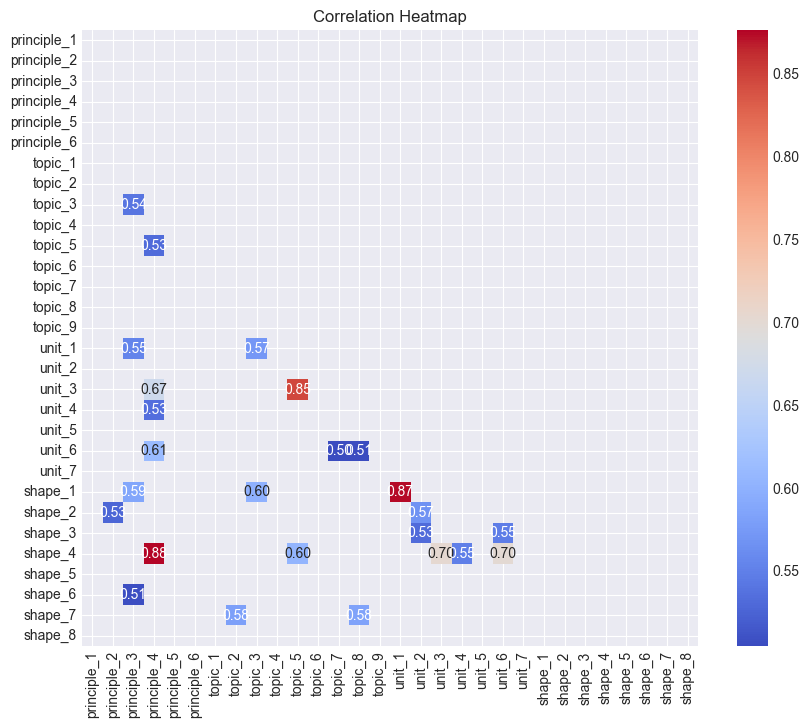

In [118]:
# Compute correlation matrix
HLS_grouped_fullrelevant = HLS_dummies_grouped.drop(['relevance_2','relevance_1', 'relevance_0', 'principle_0', 'shape_0', 'unit_0', 'topic_0'], axis=1)

# Define the threshold
threshold = 0.5  # Change this threshold as needed

# Filter the DataFrame based on the correlation threshold
corr_matrix = HLS_grouped_fullrelevant.corr().abs()
mask = corr_matrix >= threshold
filtered_corr = corr_matrix.where(mask)

# Create a mask
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_corr, mask=mask, annot=True,
            fmt='.2f', square=True, cmap='coolwarm')

plt.title('Correlation Heatmap')
plt.show()

In [ ]:
HLS_dummies

### Stats of test and train dataset

In [148]:
test = pd.read_csv('DJ_GPT_analysis/data/string/HLS_test_string.csv')
train = pd.read_csv('DJ_GPT_analysis/data/string/HLS_train_string.csv')
test.head()

,id,Text,Relevance,Principle,Topic,Unit,Shape,RELEVANCE,PRINCIPLE,TOPIC,UNIT,SHAPE
0,COP19_usa, The U.S. has led the way in the relief effo...,0,0,0,0,0,Not relevant,not evaluated,not evaluated,not evaluated,not evaluated
1,COP19_usa,"Inthe past 10 years, the U.S. has contributed ...",0,0,0,0,0,Not relevant,not evaluated,not evaluated,not evaluated,not evaluated
2,COP19_usa," Of course, scientists dont know that clima...",0,0,0,0,0,Not relevant,not evaluated,not evaluated,not evaluated,not evaluated
3,COP19_usa, It is for this reason that President Obama ...,0,0,0,0,0,Not relevant,not evaluated,not evaluated,not evaluated,not evaluated
4,COP19_usa," Last June, President Obama announced the U....",0,0,0,0,0,Not relevant,not evaluated,not evaluated,not evaluated,not evaluated


In [149]:
test[['PRINCIPLE']] .value_counts()

PRINCIPLE                  
not evaluated                  281
general normative statement     17
egalitarian                     16
prioritarian                     6
utilitarian                      6
libertarian                      3
sufficientarian                  2
dtype: int64

In [150]:
train[['PRINCIPLE']] .value_counts()

PRINCIPLE                  
not evaluated                  992
prioritarian                    66
utilitarian                     59
egalitarian                     52
general normative statement     34
sufficientarian                  8
libertarian                      1
dtype: int64